# Data augmentation for 1 coordinate systems


Empirically, we find translating to a new coordinates system given by the TORSO of the first frame of the first subject yields the best classification results. This notebooks validates the functions used to augment the data during training.

In [1]:
%matplotlib notebook
import numpy as np
import h5py
import random
import os
import sys
# Moves back one folder to use module from src folder
sys.path.insert(0, os.getcwd() + '/../')

from joints import * 
from play_skeleton import *
from src.models.data_augmentation import *

ntu_path = "/media/gnocchi/Seagate Backup Plus Drive/NTU-RGB-D/"

rgb_folder = "nturgb+d_rgb/"
skeleton_folder = "nturgb+d_skeletons/"

h5_dataset_path = "/media/gnocchi/Seagate Backup Plus Drive/NTU-RGB-D/"
dataset_file_name = "datasets.h5"
log_file_name = "log.txt"

## Import random sample

In [2]:
# Sample names in a list (total of 56880 samples)
samples_names_list = [line.rstrip('\n') for line in open(h5_dataset_path + log_file_name)]

# Shuffle samples_names_list 
random.shuffle(samples_names_list)

# Take first random sample
sample_name = samples_names_list[0]

# Open dataset
dataset = h5py.File(h5_dataset_path + dataset_file_name, 'r')

# Get sample : shape (3, max_frame, n_joints = 25, n_subjects = 2)
skeleton = dataset[sample_name]["skeleton"][:]

# Perform normalization step :
# -> Translate to torso of first subject at first frame for all frames
trans_vector = skeleton[:, 0, Joints.SPINEMID, :] # shape (3, 2)
trans_vector[:, 1] = trans_vector[:, 0]
skeleton = (skeleton.transpose(1, 2, 0, 3) - trans_vector).transpose(2, 0, 1, 3)


<IPython.core.display.Javascript object>


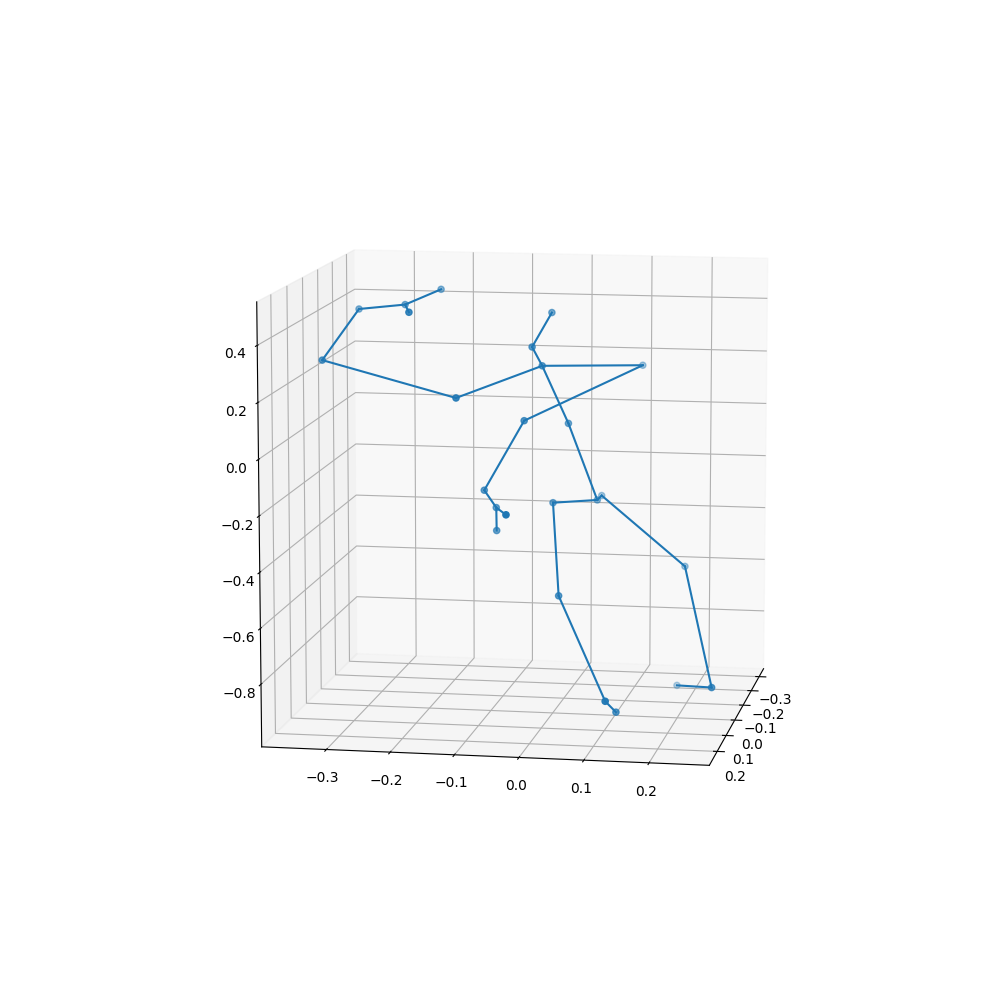

In [3]:
animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)

## Rotate sample

In [4]:
skeleton_aug = rotate_skeleton(skeleton)

<IPython.core.display.Javascript object>


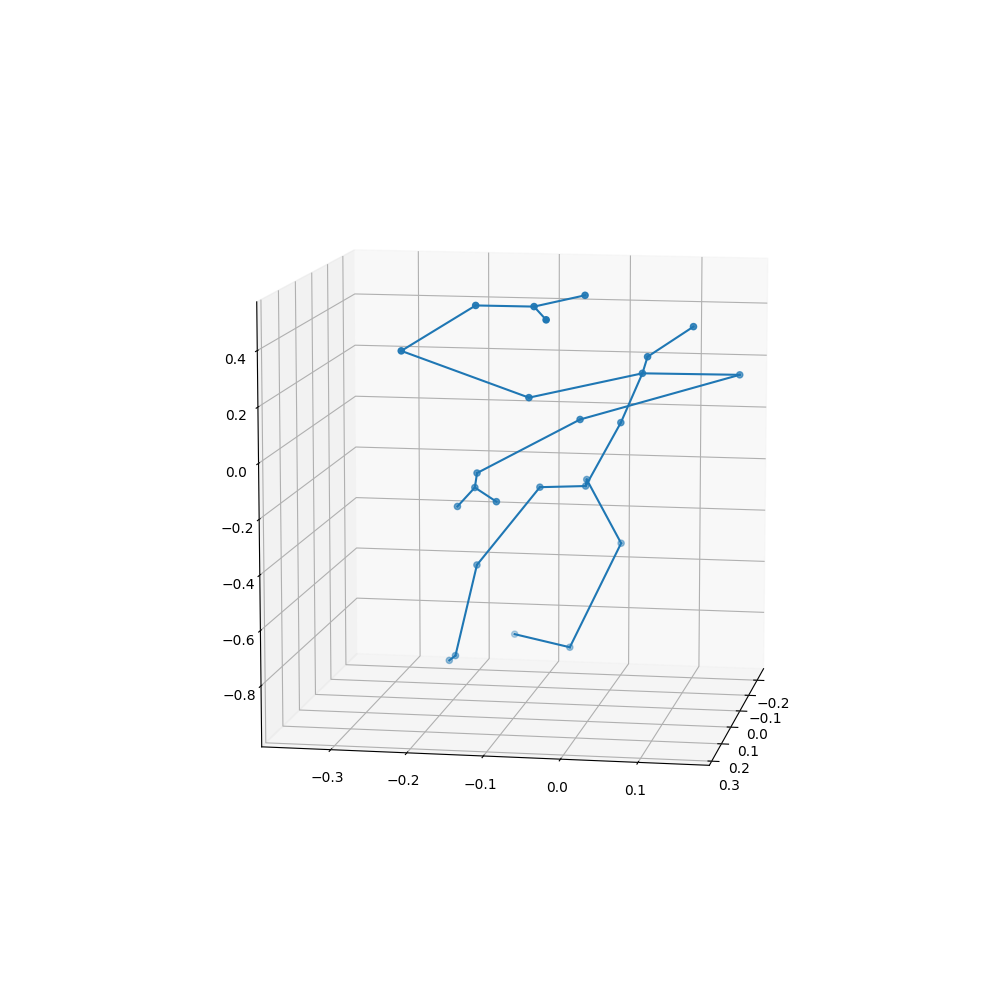

In [5]:
animateJointCoordinates(skeleton_aug.transpose(3, 2, 0, 1)[0], connexion_tuples)